In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = [[]] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True) 

<dnn_Model 00000173BBF66F50>

# read an image

In [8]:
img = cv2.imread("bharaths.jpg")

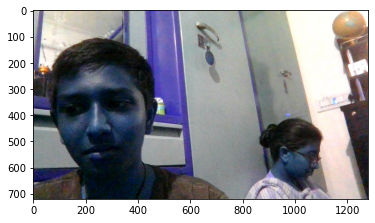

In [9]:
plt.imshow(img) ## bgr

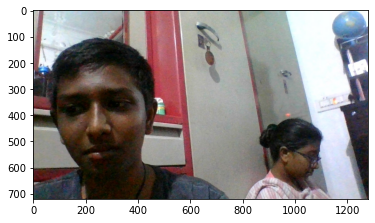

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [12]:
print(ClassIndex)

[[1]
 [1]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)

## plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# webcam

In [20]:
cap = cv2.VideoCapture(0)


if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.5)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3 )
                
    cv2.imshow('Object Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cap.destroyAllWindows()

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]

[[63]
 [ 1]]
[[65]]
[[65]
 [85]]
[[65]
 [88]]
[[65]]
[[65]
 [ 1]]
[[18]
 [65]]
[[65]
 [ 1]
 [72]
 [ 1]]
[[65]
 [18]
 [72]]
[[82]
 [65]
 [18]]
[[18]
 [65]]
[[65]]
[[65]
 [18]]
[[62]]
()
()
()
()
[[63]]
[[85]]
[[85]]
[[85]
 [62]]
[[85]
 [62]]
[[85]
 [62]]
[[85]
 [62]]
[[85]
 [62]]
[[85]
 [62]]
[[85]
 [62]]
()
()
[[63]
 [ 1]]
[[1]]
[[ 1]
 [82]]
[[82]]
[[82]
 [ 1]]
[[82]
 [65]
 [ 1]]
[[ 1]
 [65]
 [ 1]]
[[ 1]
 [65]
 [65]
 [ 1]]
[[1]
 [1]]
[[1]
 [1]]
[[ 1]
 [65]
 [ 1]]
[[60]]
[[1]]
[[1]]
[[1]]
[[59]
 [ 1]]
[[1]]
()
[[59]
 [67]]
[[1]]
[[1]]
[[62]
 [18]]
()
[[1]
 [1]]
[[59]]
()
[[77]]
()
[[77]]
()
()
[[47]]
()
()
[[47]]
()
()
[[72]]
()
()
[[18]]
[[1]]
[[1]]
[[62]]
[[18]]
[[18]]
()
()
()
()
()
[[1]]
[[18]]
[[18]
 [62]]
[[18]]
[[1]]
[[62]]
[[18]]
()
()
()
()
[[82]]
()
()
[[63]
 [62]]
[[63]]
[[63]
 [73]]
[[73]]
()
[[62]
 [62]]
[[18]]
()
()
()
()
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1

[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]
 [1]]
[[85]]
[[85]]
[[85]]
[[77]]
()
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]
 [16]]
[[85]]
[[16]]
[[85]
 [16]]
[[85]
 [16]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
()
[[85]]
[[85]]
[[85]]
[[82]
 [85]]
[[82]
 [85]]
[[82]]
[[82]]
[[82]]
[[82]]
[[82]]
[[82]]
[[82]]
[[82]]
[[82]]
[[82]
 [82]]
[[82]
 [82]]
()
()
()
[[85]]
[[85]]
[[85]]
()
()
()
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
()
[[85]]
()
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
()
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
()
()
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
[[85]]
()
()
()
[[85]]
[[85]]
[[85]]
()
()
()
()
()
()
[[1]]
[[27]]
[[27]
 [ 1]]
[[17]
 [18]
 [62]]
[[18]]
()
[[ 1]
 [62]]
[[6

KeyboardInterrupt: 